# Fine-tuning using pre-trained models
[Original url](https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/)

In [1]:
import os
# 使用第一张与第三张GPU卡
os.environ["CUDA_VISIBLE_DEVICES"] = "0, 2"


In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [3]:
train_dir = './Example_Image_Data/clean-dataset/train'
validation_dir = './Example_Image_Data/clean-dataset/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [4]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
<keras.engine.input_layer.InputLayer object at 0x7fc8adc63518> False
<keras.layers.convolutional.Conv2D object at 0x7fc8adc637f0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8adc63940> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8adc78ac8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8adc789e8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad43c9b0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8ad3d7f98> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad3ed630> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad40cfd0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad3bf710> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8ad35e7b8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad35ee48> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad394780> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ad33

## Experiment 1
Train the model

Found 601 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
3/2 [======================================] - 10s 3s/step - loss: 4.5059 - acc: 0.3463 - val_loss: 4.3553 - val_acc: 0.4867
Epoch 2/20
3/2 [======================================] - 2s 667ms/step - loss: 3.2647 - acc: 0.4444 - val_loss: 0.8149 - val_acc: 0.6067
Epoch 3/20
3/2 [======================================] - 2s 657ms/step - loss: 0.6746 - acc: 0.7021 - val_loss: 0.5237 - val_acc: 0.7800
Epoch 4/20
3/2 [======================================] - 2s 659ms/step - loss: 0.4829 - acc: 0.8097 - val_loss: 1.0699 - val_acc: 0.5933
Epoch 5/20
3/2 [======================================] - 2s 673ms/step - loss: 0.7395 - acc: 0.7153 - val_loss: 0.4211 - val_acc: 0.8733
Epoch 6/20
3/2 [======================================] - 2s 669ms/step - loss: 0.2585 - acc: 0.9157 - val_loss: 0.4057 - val_acc: 0.8467
Epoch 7/20
3/2 [============================

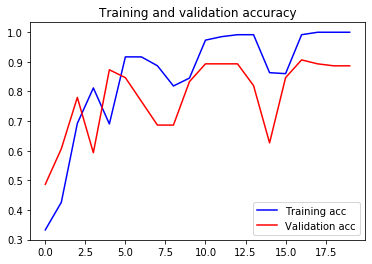

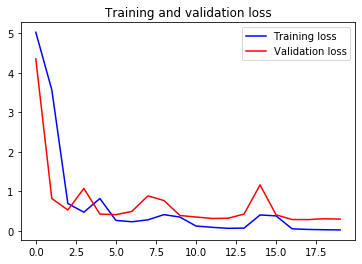

In [5]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 256
val_batchsize = 100

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('./Example_Image_Data/all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 1
Show the errors

Found 150 images belonging to 3 classes.
2/1 [========================================] - 1s 316ms/step
No of errors = 17/150


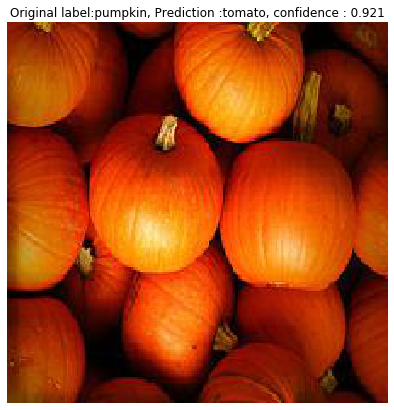

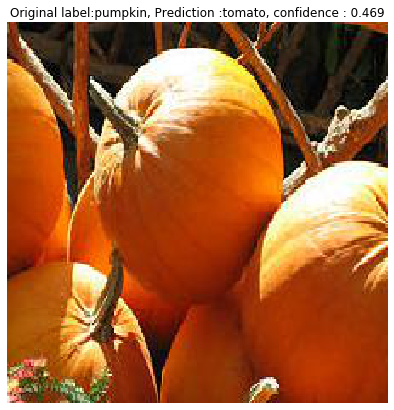

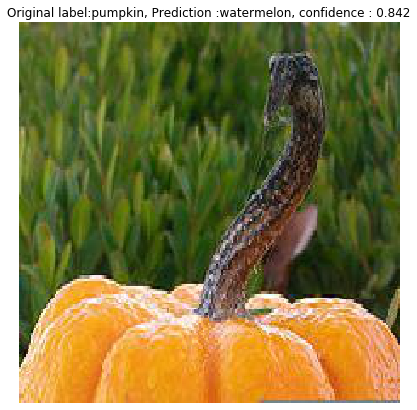

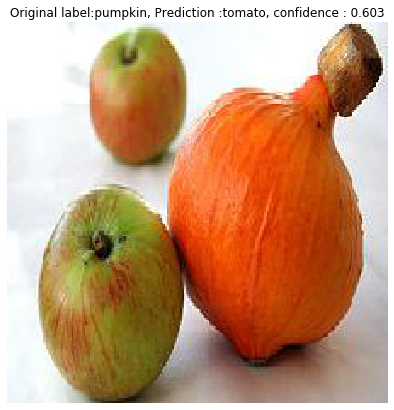

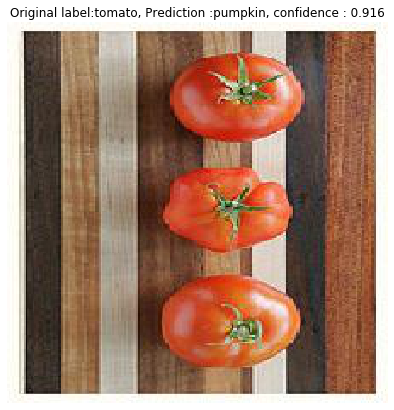

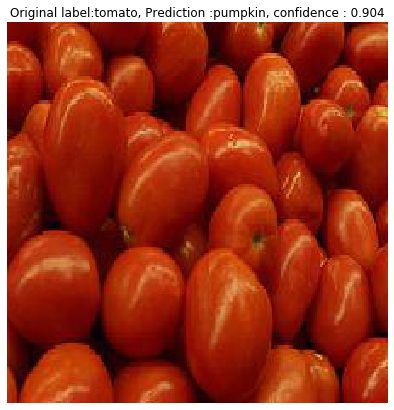

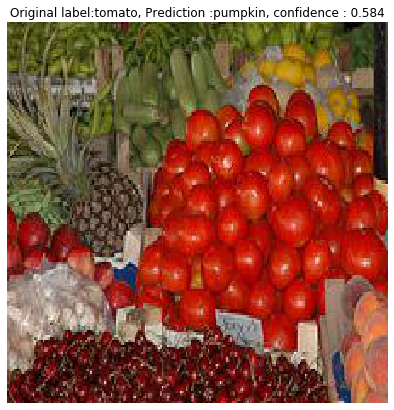

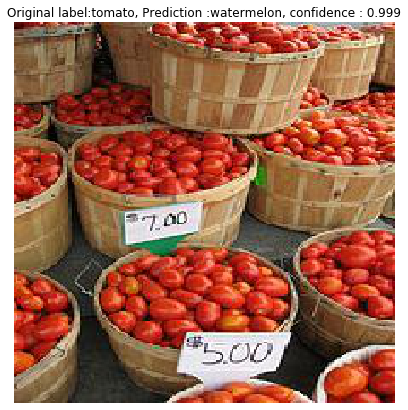

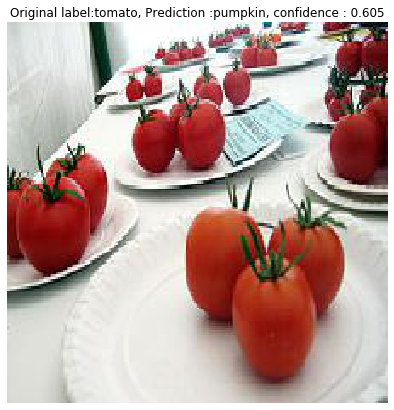

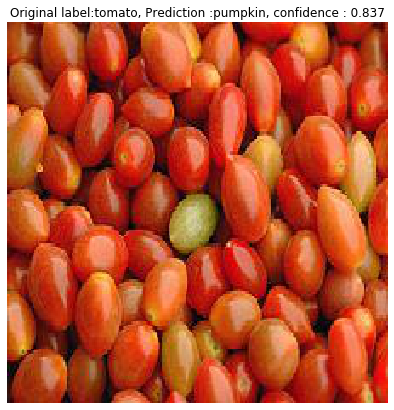

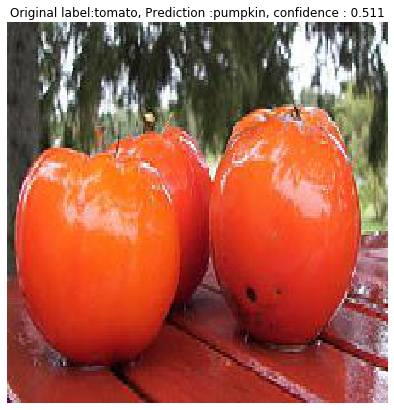

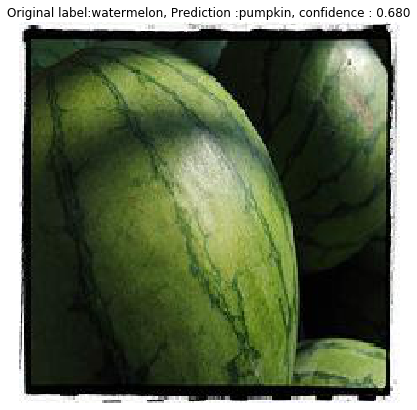

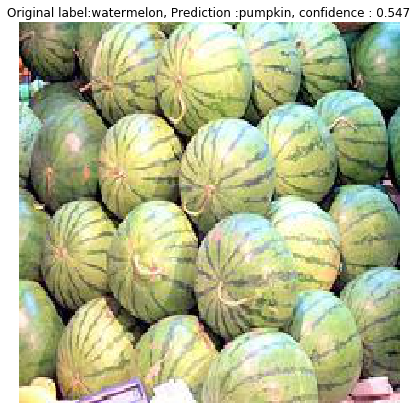

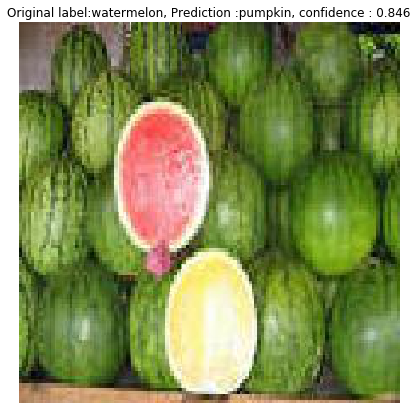

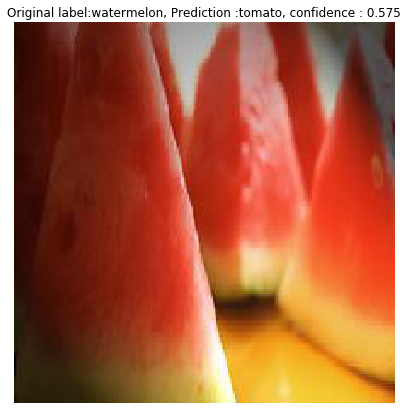

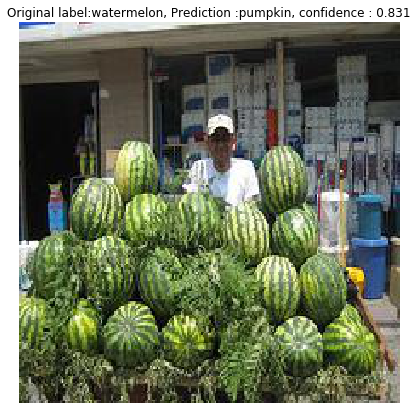

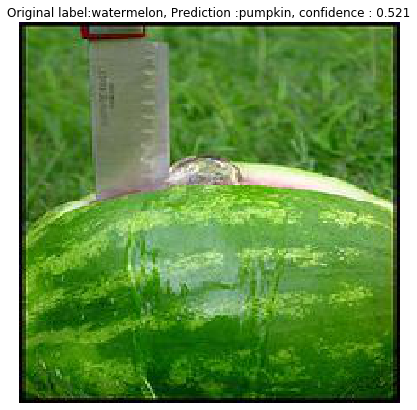

In [6]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Experiment 2 : Train Last 4 layers without data augmentation

In [7]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7fc8a5c8b0f0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5c8beb8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5c3eef0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8a5d2ca90> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5d2c128> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5d55a20> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8a5cfb470> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5cfb780> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ac020be0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ac0354a8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc96d7f75c0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5dbe320> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ac0549b0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8ac07a940> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8ac145208>

## Experiment 2
Train the model

Found 601 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/20
7/6 [==================================] - 4s 561ms/step - loss: 2.4225 - acc: 0.3935 - val_loss: 2.0070 - val_acc: 0.3333
Epoch 2/20
7/6 [==================================] - 2s 331ms/step - loss: 1.0558 - acc: 0.5087 - val_loss: 1.6743 - val_acc: 0.3533
Epoch 3/20
7/6 [==================================] - 2s 333ms/step - loss: 0.7489 - acc: 0.7361 - val_loss: 2.2962 - val_acc: 0.4533
Epoch 4/20
7/6 [==================================] - 2s 330ms/step - loss: 1.3493 - acc: 0.6355 - val_loss: 0.8986 - val_acc: 0.4933
Epoch 5/20
7/6 [==================================] - 2s 332ms/step - loss: 0.3708 - acc: 0.8629 - val_loss: 0.3135 - val_acc: 0.8800
Epoch 6/20
7/6 [==================================] - 2s 332ms/step - loss: 0.1439 - acc: 0.9577 - val_loss: 0.2478 - val_acc: 0.9133
Epoch 7/20
7/6 [==================================] - 2s 331ms/step - loss: 0.0565 - acc: 0.9840 - val_loss: 1.125

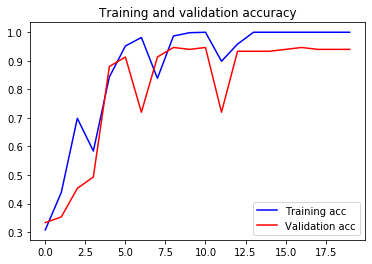

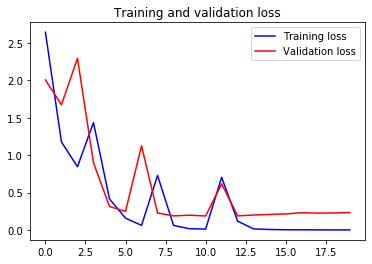

In [8]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('./Example_Image_Data/last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 2
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 1s 41ms/step
No of errors = 9/150


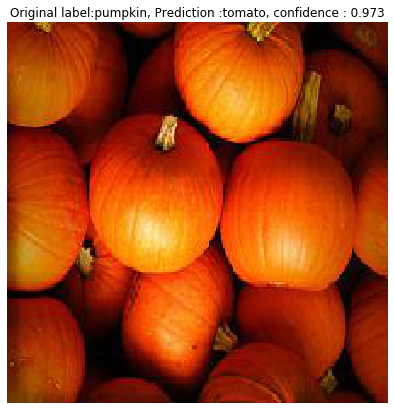

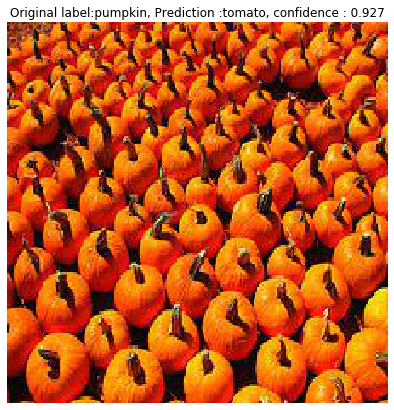

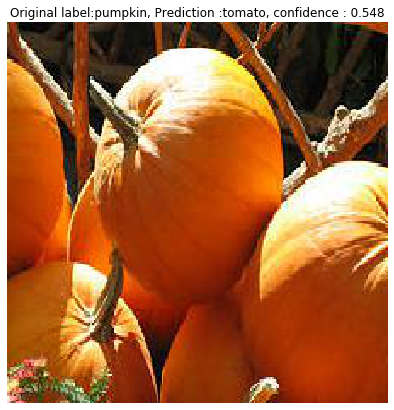

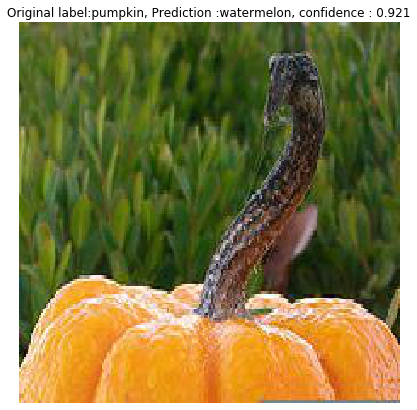

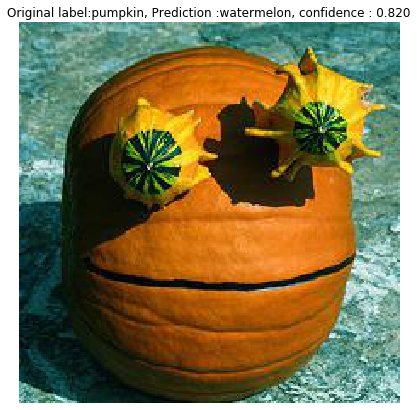

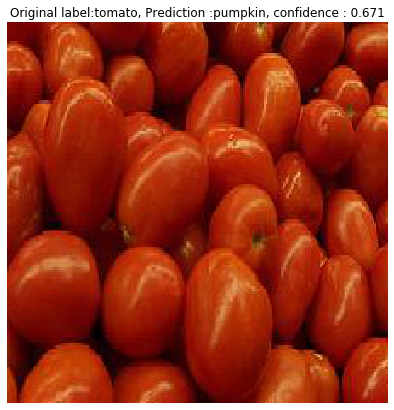

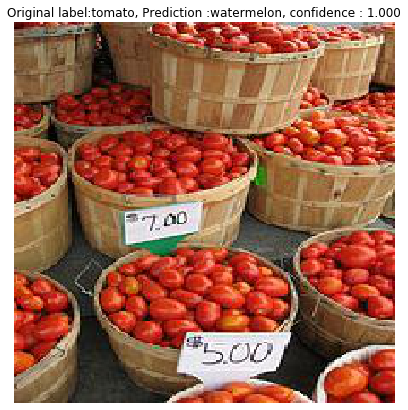

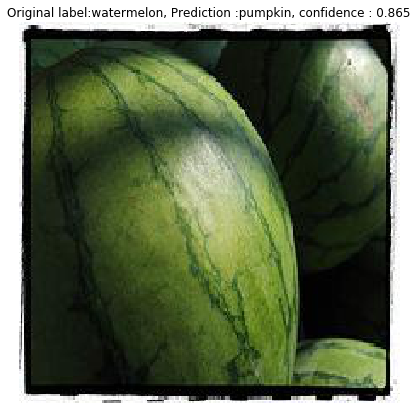

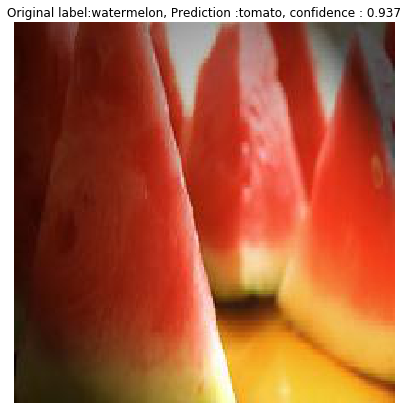

In [9]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

## Experiment 3 : Train last 4 layers with data augmentation


In [10]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x7fc8a5ddb320> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5ddb240> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a5ddb4e0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8a74770b8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a0103198> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a716f7b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8a710d7b8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a710d6d8> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a70c1860> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a70e1978> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8a70998d0> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a7099240> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a7050550> False
<keras.layers.convolutional.Conv2D object at 0x7fc8a706aba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc8a7022400>

## Experiment 3
Train the model. Here we will be using the imageDataGenerator for data augmentation.

Found 601 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/40
25/24 [===============================] - 10s 385ms/step - loss: 1.4301 - acc: 0.4664 - val_loss: 0.4845 - val_acc: 0.8467
Epoch 2/40
25/24 [===============================] - 9s 345ms/step - loss: 0.5409 - acc: 0.7793 - val_loss: 0.2807 - val_acc: 0.8933
Epoch 3/40
25/24 [===============================] - 9s 346ms/step - loss: 0.2608 - acc: 0.9254 - val_loss: 0.1366 - val_acc: 0.9533
Epoch 4/40
25/24 [===============================] - 9s 360ms/step - loss: 0.1333 - acc: 0.9599 - val_loss: 0.1619 - val_acc: 0.9600
Epoch 5/40
25/24 [===============================] - 9s 354ms/step - loss: 0.1140 - acc: 0.9615 - val_loss: 0.1990 - val_acc: 0.9667
Epoch 6/40
25/24 [===============================] - 9s 356ms/step - loss: 0.0692 - acc: 0.9743 - val_loss: 1.3040 - val_acc: 0.7400
Epoch 7/40
25/24 [===============================] - 9s 356ms/step - loss: 0.0931 - acc: 0.9743 - val_loss: 0.1706 - va

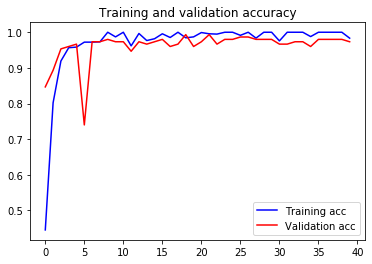

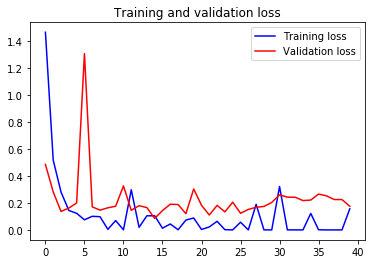

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 50
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
# NOTE that we have multiplied the steps_per_epoch by 2. This is because we are using data augmentation.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=2*train_generator.samples/train_generator.batch_size ,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the Model
model.save('./Example_Image_Data/da_last4_layers.h5')

# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Experiment 3
Show the errors

Found 150 images belonging to 3 classes.
15/15 [==============================] - 1s 41ms/step
No of errors = 4/150


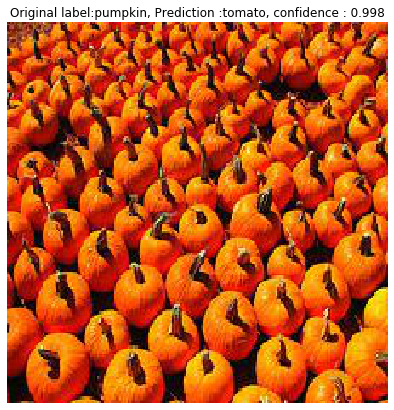

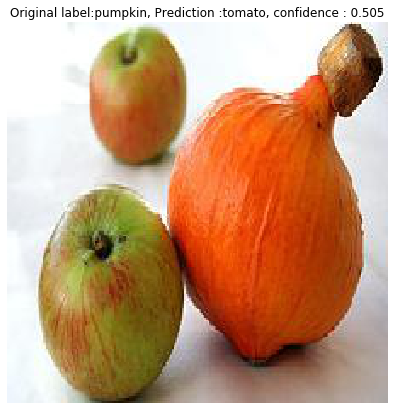

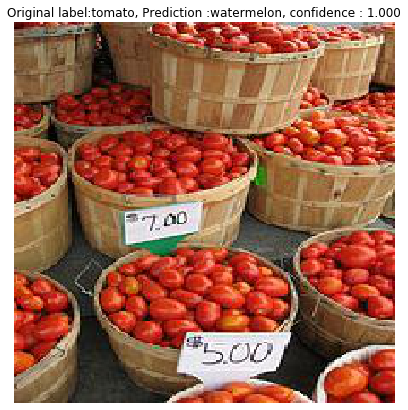

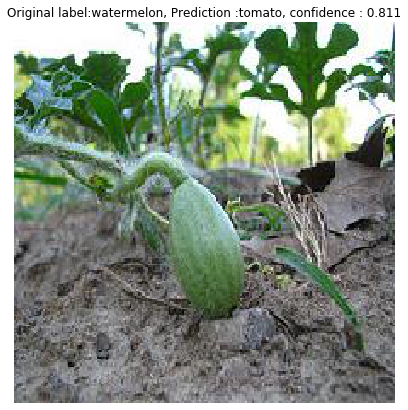

In [12]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes

# Get the label to class mapping from the generator
label2index = validation_generator.class_indices

# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
    
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()